## ***Transforming Movie-lens collaborative filtering dataset into Music Recommendation system user activity dataset***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
album_df = pd.read_csv('movies.csv', usecols=['movieId', 'title'], dtype = {'movieId':'int32', 'title':'str'})
album_df['albumId'] = album_df['movieId']
album_df.pop('movieId');
sentiment_df = pd.read_csv('ratings.csv', usecols = ['userId', 'movieId'],dtype={'userId': 'int32', 'movieId': 'int32'})
sentiment_df['albumId'] = sentiment_df['movieId']
sentiment_df.pop('movieId');

In [4]:
print(album_df.shape)
album_df.head()

(9125, 2)


,title,albumId
0,Toy Story (1995),1
1,Jumanji (1995),2
2,Grumpier Old Men (1995),3
3,Waiting to Exhale (1995),4
4,Father of the Bride Part II (1995),5


In [5]:
print(sentiment_df.shape)
sentiment_df.head()

(100004, 2)


,userId,albumId
0,1,31
1,1,1029
2,1,1061
3,1,1129
4,1,1172


In [6]:
sentiment_df = sentiment_df.sample(100004).reset_index(drop=True)

## ***Feature-Engineering***

**`To simulate real-world data, we would have albumIds 40% skipped, 10% disliked, 50% liked (out of which 10% would be added to playlists).`**

### ***Feature Engineering : Skipped Albums***

In [7]:
sentiment_df['skipped'] = 0
sentiment_df.head()

,userId,albumId,skipped
0,371,33679,0
1,83,6863,0
2,312,1264,0
3,380,3988,0
4,30,858,0


In [8]:
sentiment_df.iloc[:40001]['skipped'] = 1 #40% skipped
sentiment_df.head()

,userId,albumId,skipped
0,371,33679,1
1,83,6863,1
2,312,1264,1
3,380,3988,1
4,30,858,1


<AxesSubplot:xlabel='skipped', ylabel='count'>

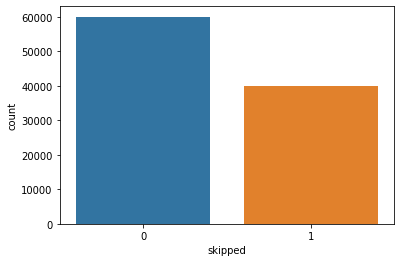

In [9]:
sns.countplot(sentiment_df['skipped'])

### ***Feature Engineering : Disliked Albums***

In [10]:
sentiment_df = sentiment_df.sample(100004).reset_index(drop=True)
sentiment_df['disliked'] = 0

In [11]:
counter=0
for ind in sentiment_df.index:
    if sentiment_df["skipped"][ind]==0:
        if counter<10001:   #10% disliked
            sentiment_df['disliked'][ind] = 1
            counter+=1
        else:
            break

        
sentiment_df.head()
        

,userId,albumId,skipped,disliked
0,452,586,1,0
1,284,79,0,1
2,102,3201,1,0
3,213,7451,0,1
4,346,185,1,0


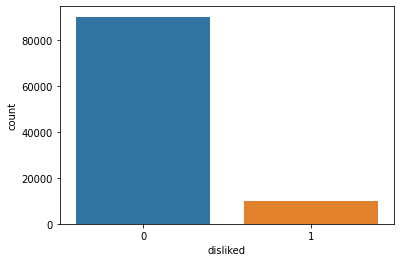

In [12]:
sns.countplot(sentiment_df['disliked']);

### ***Feature Engineering : Liked Albums***

In [13]:
sentiment_df = sentiment_df.sample(100004).reset_index(drop=True)
sentiment_df['liked'] = 0
sentiment_df.head()

,userId,albumId,skipped,disliked,liked
0,200,6373,0,0,0
1,416,508,0,0,0
2,624,2003,0,0,0
3,182,342,0,0,0
4,536,194,0,0,0


In [14]:
counter=0
for ind in sentiment_df.index:
    if (sentiment_df["skipped"][ind]==0) and (sentiment_df['disliked'][ind]==0):
        if counter<50001:   #50% liked
            sentiment_df['liked'][ind] = 1
            counter+=1
        else:
            break

        
sentiment_df.head()
        

,userId,albumId,skipped,disliked,liked
0,200,6373,0,0,1
1,416,508,0,0,1
2,624,2003,0,0,1
3,182,342,0,0,1
4,536,194,0,0,1


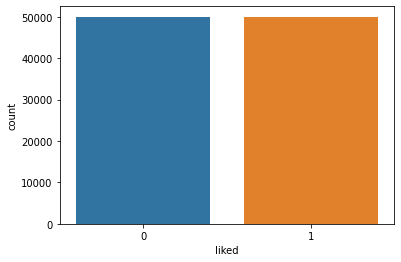

In [15]:
sns.countplot(sentiment_df['liked']);

### ***Feature Engineering : Album added to playlist***

In [16]:
sentiment_df = sentiment_df.sample(100004).reset_index(drop=True)
sentiment_df['addedToPlaylist'] = 0
sentiment_df.head()

,userId,albumId,skipped,disliked,liked,addedToPlaylist
0,518,2301,0,0,1,0
1,439,235,0,0,1,0
2,290,150,0,1,0,0
3,97,4226,1,0,0,0
4,214,2501,1,0,0,0


In [17]:
counter=0
for ind in sentiment_df.index:
    if sentiment_df['liked'][ind] == 1:
        if counter<10001:   #10% of liked albums are added to playlist
            sentiment_df['addedToPlaylist'][ind] = 1
            counter+=1
        else:
            break

        
sentiment_df.head()

,userId,albumId,skipped,disliked,liked,addedToPlaylist
0,518,2301,0,0,1,1
1,439,235,0,0,1,1
2,290,150,0,1,0,0
3,97,4226,1,0,0,0
4,214,2501,1,0,0,0


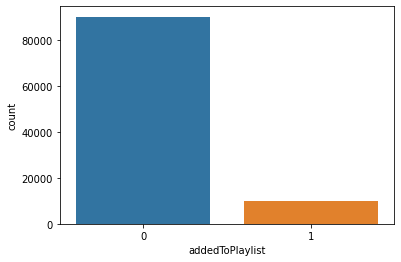

In [18]:
sns.countplot(sentiment_df['addedToPlaylist']);

## ***Idle Users***

In [19]:
sentiment_df[(sentiment_df['skipped']==0)&(sentiment_df['disliked']==0)&(sentiment_df['liked']==0)]

,userId,albumId,skipped,disliked,liked,addedToPlaylist
78980,166,2797,0,0,0,0


## ***Feature Engineering : User Sentiment***

In [20]:
sentiment_df = sentiment_df.sample(100004).reset_index(drop=True)
sentiment_df['sentiment'] = 1
sentiment_df['sentiment']+= (sentiment_df['skipped']*(-0.2))+(sentiment_df['disliked']*(-0.5))+(sentiment_df['liked']*(0.2))+(sentiment_df['addedToPlaylist']*(0.5))
sentiment_df.head()

,userId,albumId,skipped,disliked,liked,addedToPlaylist,sentiment
0,250,59784,1,0,0,0,0.8
1,313,7458,0,0,1,0,1.2
2,584,4226,0,0,1,0,1.2
3,585,2078,1,0,0,0,0.8
4,51,913,0,0,1,0,1.2


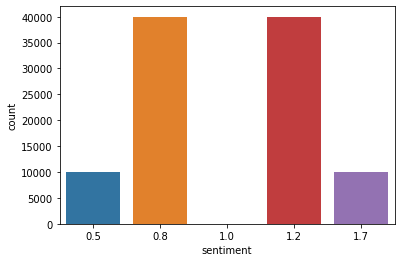

In [21]:
sns.countplot(sentiment_df['sentiment']);

> **`Here we have tried to create user(population) activities somewhat a gaussian normal distribution`**

## ***Feature Extraction***

In [22]:
sentiment_df = sentiment_df[['userId', 'albumId', 'sentiment']]
sentiment_df.head()

,userId,albumId,sentiment
0,250,59784,0.8
1,313,7458,1.2
2,584,4226,1.2
3,585,2078,0.8
4,51,913,1.2


In [23]:
album_df = album_df.rename(columns={'title': 'albumTitle'})
album_df.head()

,albumTitle,albumId
0,Toy Story (1995),1
1,Jumanji (1995),2
2,Grumpier Old Men (1995),3
3,Waiting to Exhale (1995),4
4,Father of the Bride Part II (1995),5


***Merging user sentiment data and album meta data***

In [24]:
df = pd.merge(sentiment_df,album_df,on='albumId')
df.head()

,userId,albumId,sentiment,albumTitle
0,250,59784,0.8,Kung Fu Panda (2008)
1,20,59784,1.2,Kung Fu Panda (2008)
2,397,59784,0.8,Kung Fu Panda (2008)
3,380,59784,1.2,Kung Fu Panda (2008)
4,655,59784,1.7,Kung Fu Panda (2008)


In [25]:
# Subset parameter defines in which columns to look for missing values.
combine_album_sentiment = df.dropna(axis=0, subset=['albumTitle'])
album_sentimentCount = (combine_album_sentiment.groupby(by=['albumTitle'])['sentiment'].count().reset_index().rename(columns={'sentiment':'popularity'}))[['albumTitle','popularity']]
print(album_sentimentCount.shape)
combine_album_sentiment.head()

(9064, 2)


,userId,albumId,sentiment,albumTitle
0,250,59784,0.8,Kung Fu Panda (2008)
1,20,59784,1.2,Kung Fu Panda (2008)
2,397,59784,0.8,Kung Fu Panda (2008)
3,380,59784,1.2,Kung Fu Panda (2008)
4,655,59784,1.7,Kung Fu Panda (2008)


In [26]:
album_sentimentCount.head()

,albumTitle,popularity
0,"""Great Performances"" Cats (1998)",2
1,$9.99 (2008),3
2,'Hellboy': The Seeds of Creation (2004),1
3,'Neath the Arizona Skies (1934),1
4,'Round Midnight (1986),2


In [27]:
# We here do left join based on albumTitle column in combine_album_sentiment (as left dataframe) and albumTitle column in album_sentimentCount (as right dataframe)
sentiment_with_popularity = combine_album_sentiment.merge(album_sentimentCount, left_on = 'albumTitle', right_on='albumTitle', how= 'left')
print(sentiment_with_popularity.shape)
sentiment_with_popularity.sample(5)

(100004, 5)


,userId,albumId,sentiment,albumTitle,popularity
75437,544,6978,1.7,Slacker (1991),5
74574,306,3685,0.5,Prizzi's Honor (1985),15
81242,624,5308,1.2,Three Men and a Baby (1987),19
56580,580,1101,1.2,Top Gun (1986),74
66089,574,8528,0.5,Dodgeball: A True Underdog Story (2004),37


In [28]:
# Describing the popularity column statistically
pd.set_option('display.float_format', lambda x: '%.3f' %x)
print(album_sentimentCount['popularity'].describe())

count   9064.000
mean      11.033
std       24.053
min        1.000
25%        1.000
50%        3.000
75%        9.000
max      341.000
Name: popularity, dtype: float64


In [29]:
sentiment_with_popularity['popularity'].apply(np.ceil)
album_sentimentCount['popularity'].apply(np.ceil)
print()

## ***Statistical Thresholding***

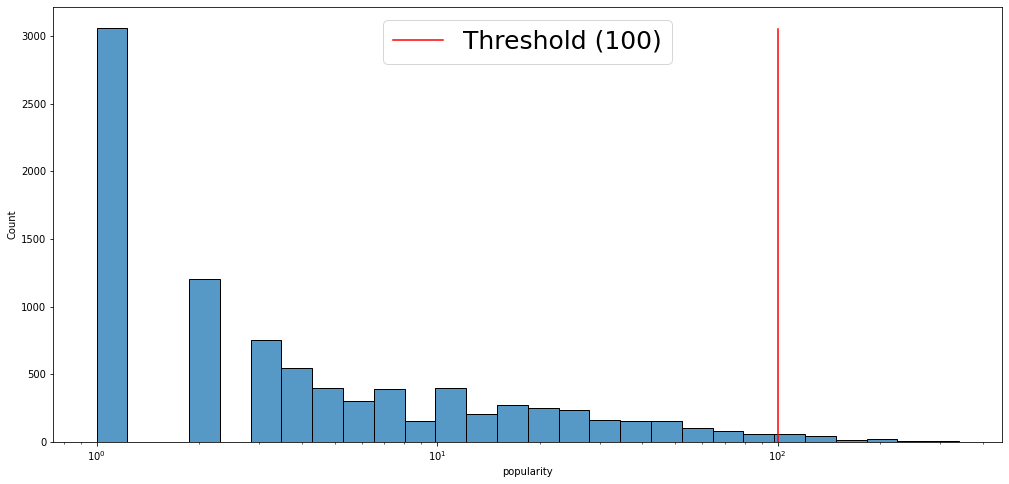

In [30]:
fig, ax = plt.subplots(figsize=(17,8))
plt.axvline(x=100,ymax=0.95, c='red', label = 'Threshold (100)');
sns.histplot(ax=ax, data = album_sentimentCount['popularity'], log_scale=True);
plt.legend(fontsize=25);

In [31]:
popularity_threshold = 100
popular_album_sentiment = sentiment_with_popularity.query('popularity >= @popularity_threshold')
print(popular_album_sentiment.shape)
popular_album_sentiment.sample(5)

(22663, 5)


,userId,albumId,sentiment,albumTitle,popularity
48934,59,2329,1.200,American History X (1998),107
22177,111,150,0.500,Apollo 13 (1995),200
14504,442,4993,1.200,"Lord of the Rings: The Fellowship of the Ring,...",200
36921,334,2571,0.800,"Matrix, The (1999)",259
10875,73,2959,0.800,Fight Club (1999),202


## ***Building a Feature vector***

In [32]:
album_features_df=popular_album_sentiment.pivot_table(index='albumTitle',columns='userId',values='sentiment').fillna(0)
print(album_features_df.shape)
album_features_df.head()

(151, 659)


userId,2,3,4,5,6,7,8,9,10,11,...,662,663,664,665,666,667,668,669,670,671
albumTitle,,,,,,,,,,,,,,,,,,,,,
2001: A Space Odyssey (1968),0.000,0.000,0.000,0.000,0.000,1.200,0.000,0.000,0.000,0.000,...,0.000,0.000,0.800,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Ace Ventura: Pet Detective (1994),0.000,0.000,0.000,0.800,0.000,0.000,0.000,0.000,1.200,0.000,...,0.500,0.000,0.000,0.800,0.800,0.000,0.000,0.000,0.000,0.000
Airplane! (1980),0.000,0.000,0.800,0.000,0.000,0.000,0.500,0.000,0.000,0.000,...,0.000,0.000,0.000,0.800,0.000,0.000,0.000,0.000,0.000,0.000
Aladdin (1992),0.800,1.200,0.500,1.200,0.000,0.500,0.000,0.000,0.000,0.000,...,1.200,0.000,0.000,1.700,0.800,0.000,0.000,0.000,0.000,1.200
Alien (1979),0.000,0.000,0.800,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,1.200,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [33]:
from scipy.sparse import csr_matrix # To convert pivot table to array matrix
album_features_df_matrix = csr_matrix(album_features_df.values)

## ***Recommendation System Modelling***
`Algorithm` : *Nearest Neighbors*

In [34]:
# this is not K - Nearest Neighbors classifier or regressor. It's NearestNeighbors
from sklearn.neighbors import NearestNeighbors
# Generally, we use KNN to find similar vectors based on euclidean distance, but here we use the distance metric as cosine score
model_knn = NearestNeighbors(metric = 'cosine')
model_knn.fit(album_features_df_matrix)

NearestNeighbors(metric='cosine')

In [35]:
query_index = np.random.choice(album_features_df.shape[0])
print(query_index)
# Getting euclidean distance based on cosine metric and indices of respective neighbors which are nearest
distances, indices = model_knn.kneighbors(album_features_df.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)

61


In [36]:
# .flatten() returns a copy of the array collapsed into one dimension (row major).
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for the album : {0}\n'.format(album_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, album_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for the album : Godfather, The (1972)

1: Godfather: Part II, The (1974), with distance of 0.34160910954405777:
2: Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981), with distance of 0.4663159767178374:
3: Goodfellas (1990), with distance of 0.47248921063278415:
4: Star Wars: Episode IV - A New Hope (1977), with distance of 0.483449553745108:
5: One Flew Over the Cuckoo's Nest (1975), with distance of 0.4838941483204948:
